Statistics of Description Dataset
==================

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as pltColors
import numpy as np
import csv
from collections import Counter, defaultdict

In [2]:
# Load files
inputFile = 'cat_desc.csv'
headers = None
data = Counter()
with open(inputFile) as fin:
    r = csv.reader(fin)
    for row in r:
        if headers is None:
            headers = row
            print headers
        else:
            data[tuple(row[:-1])] += int(row[-1])

['category_id', 'description', 'count']


In [3]:
# Count various frequencys
wordList = []
descOccur = Counter()
descCat = Counter()
catOccur = Counter()
catUniqueWord = Counter()
for (c, d), v in data.iteritems():
    wordList.append(d)
    descOccur[d]+=v
    descCat[d] += 1
    catOccur[c] += v
    catUniqueWord[c] += 1
print 'Number of valid answers:', sum(catOccur.values())
print 'Number of distinct descriptions:', len(wordList)
print 'Number of categories:', len(catOccur.keys())

Number of valid answers: 5116436
Number of distinct descriptions: 477354
Number of categories: 1055


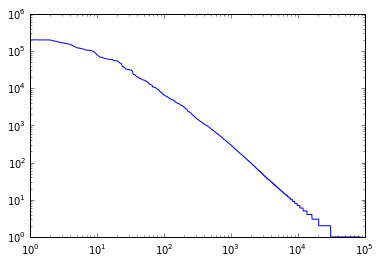

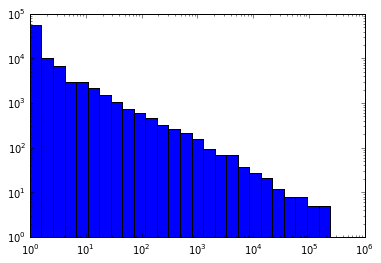

In [4]:
# log rank - log #occurance, for distinct descriptions
pltData = [v for k, v in descOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #occurance, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 6.0, 30))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

1055


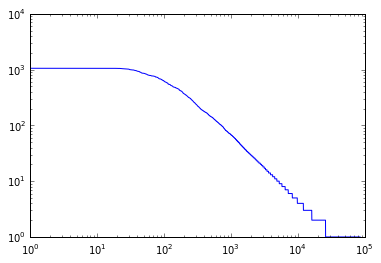

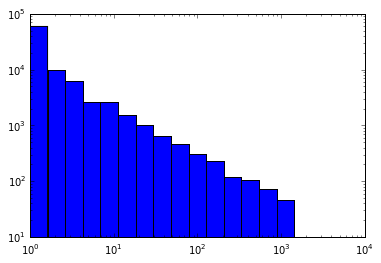

In [5]:
# log rank - log #category, for distinct descriptions
pltData = [v for k, v in descCat.most_common()]
print max(pltData)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #category, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 4.0, 20))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

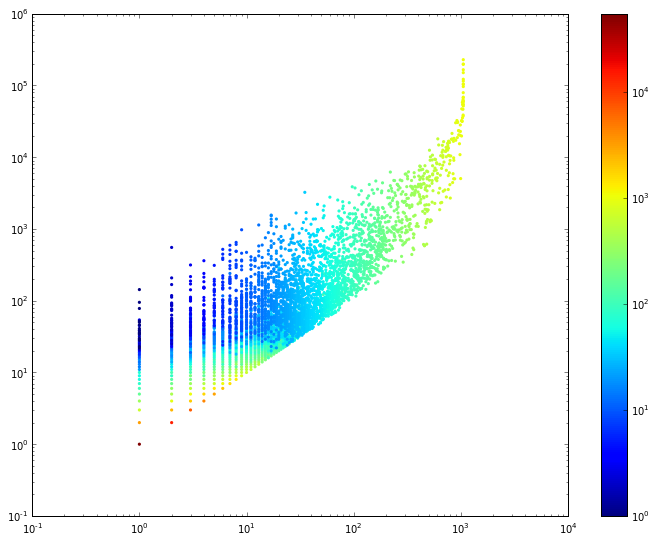

In [6]:
# log #category - log #occurance - (color) log frequency, for distinct descriptions
pltData1 = [descCat[w] for w in wordList]
pltData2 = [descOccur[w] for w in wordList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
# pltColor = np.log10(pltColor)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='', norm=pltColors.LogNorm())
cbar = fig.colorbar(scat, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

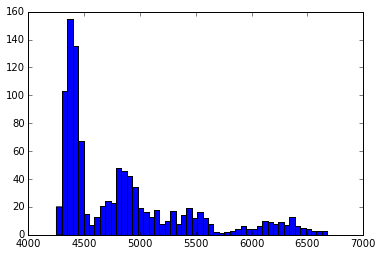

In [7]:
# histogram of #occurance, for each category
pltData = [v for k, v in catOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

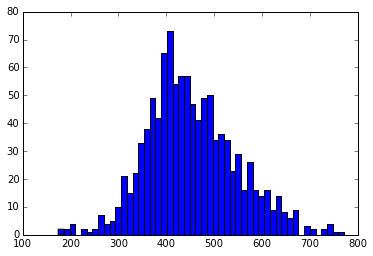

In [8]:
# histogram of #(unique descriptions), for each category
pltData = [v for k, v in catUniqueWord.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

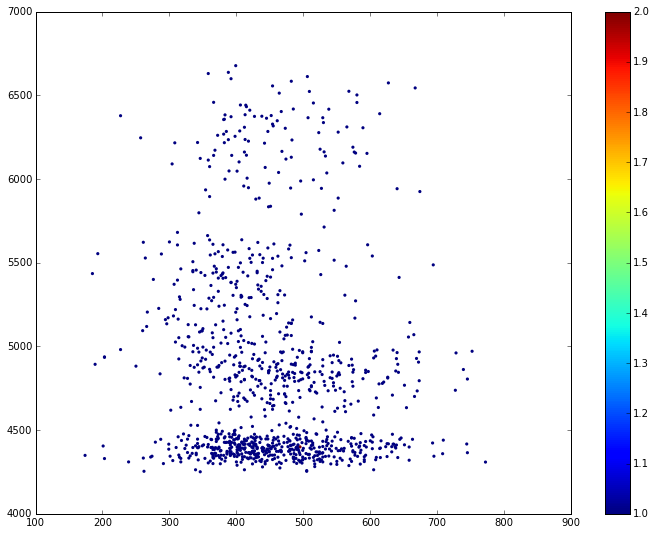

In [9]:
# #(unique descriptions) - #occurance - (color) log frequency, for each category
catList = list(catOccur.keys())
pltData1 = [catUniqueWord[c] for c in catList]
pltData2 = [catOccur[c] for c in catList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='')
cbar = fig.colorbar(scat, ax=ax)
plt.show()